In [19]:
import pandas as pd


# read data from csv
df = pd.read_csv('all_data_541983310278725782.csv')

# rename columns: timestamp, connected to Date, Value
df.rename(columns={'timestamp': 'Date', 'connected': 'Value'}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


df['Value'] = df['Value'].astype(int)


In [20]:
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.2)
test_size = len(df) - train_size - val_size

train, val, test = df.iloc[0:train_size], df.iloc[train_size:train_size+val_size], df.iloc[train_size+val_size:len(df)]

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
test_scaled = scaler.transform(test)


In [22]:
import numpy as np

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10

X_train, y_train = create_dataset(train, train.Value, time_steps)
X_val, y_val = create_dataset(val, val.Value, time_steps)
X_test, y_test = create_dataset(test, test.Value, time_steps)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    shuffle=False
)


Epoch 1/30


/Users/niaki/Workspace/personal/Elia-Hackathon-Steering/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9224 - loss: 0.2656 - val_accuracy: 0.9731 - val_loss: 0.0835
Epoch 2/30
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9796 - loss: 0.0854 - val_accuracy: 0.9864 - val_loss: 0.0691
Epoch 3/30
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9856 - loss: 0.0739 - val_accuracy: 0.9866 - val_loss: 0.0670
Epoch 4/30
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9856 - loss: 0.0723 - val_accuracy: 0.9864 - val_loss: 0.0663
Epoch 5/30
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9856 - loss: 0.0717 - val_accuracy: 0.9864 - val_loss: 0.0661
Epoch 6/30
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9856 - loss: 0.0712 - val_accuracy: 0.9864 - val_loss: 0.0659
Epoch 7/30
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9856 - loss: 0.0708 - val_accuracy: 0.9863 - val_loss: 0.0660
Epoch 8/30
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9856 - loss: 0.0705 - val_accuracy: 0.9862 - val_

In [24]:
y_pred = model.predict(X_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [25]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9866 - loss: 0.0651
Test loss: 0.0663071945309639
Test accuracy: 0.9862869381904602


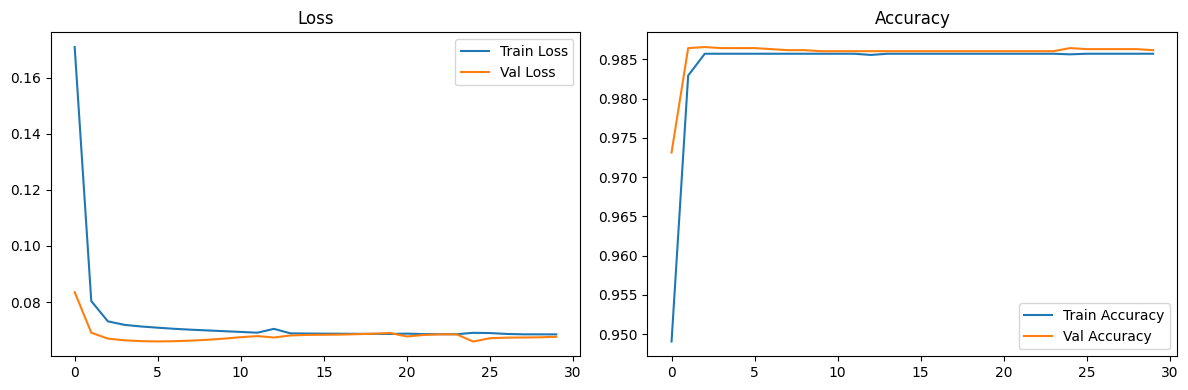

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


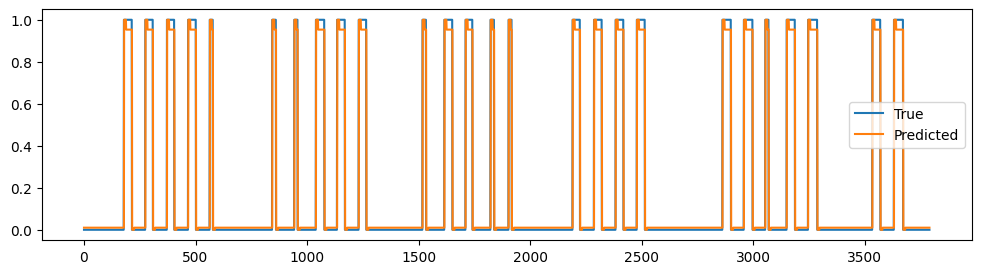

In [27]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)

# print(classification_report(y_test, y_pred))

# roc_auc = roc_auc_score(y_test, y_pred)
# print('AUC-ROC:', roc_auc)


# plot y_test and y_pred
plt.figure(figsize=(12, 3))
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()




In [29]:
# save the model
model.save('models/model_541983310278725782.keras')